In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, LabelEncoder




In [ ]:
df = pd.read_csv('/content/drive/MyDrive/long_data_.csv')

df.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9


In [ ]:
df.info()

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   States     16599 non-null  object 
 1   Regions    16599 non-null  object 
 2   latitude   16599 non-null  float64
 3   longitude  16599 non-null  float64
 4   Dates      16599 non-null  object 
 5   Usage      16599 non-null  float64
dtypes: float64(3), object(3)
memory usage: 778.2+ KB


States       0
Regions      0
latitude     0
longitude    0
Dates        0
Usage        0
dtype: int64

In [ ]:
df.dropna(inplace=True)

df.isnull().sum()


States       0
Regions      0
latitude     0
longitude    0
Dates        0
Usage        0
dtype: int64

**Convert Dates to Datetime Format**

In [ ]:
df['Dates'] = pd.to_datetime(df['Dates'], format='%d/%m/%Y %H:%M:%S')

# Verify the conversion
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   States     16599 non-null  object        
 1   Regions    16599 non-null  object        
 2   latitude   16599 non-null  float64       
 3   longitude  16599 non-null  float64       
 4   Dates      16599 non-null  datetime64[ns]
 5   Usage      16599 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 778.2+ KB


**Label Encoding for Regions Column**

In [ ]:
label_encoder = LabelEncoder()
df['Regions'] = label_encoder.fit_transform(df['Regions'])

df.head()


,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,2,31.519974,75.980003,2019-01-02,119.9
1,Haryana,2,28.450006,77.019991,2019-01-02,130.3
2,Rajasthan,2,26.449999,74.639981,2019-01-02,234.1
3,Delhi,2,28.669993,77.230004,2019-01-02,85.8
4,UP,2,27.599981,78.050006,2019-01-02,313.9


In [ ]:
scaler = MinMaxScaler()

# Normalize the 'Usage' column
df['Usage'] = scaler.fit_transform(df[['Usage']])

df.head()


,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,2,31.519974,75.980003,2019-01-02,0.229207
1,Haryana,2,28.450006,77.019991,2019-01-02,0.249138
2,Rajasthan,2,26.449999,74.639981,2019-01-02,0.448064
3,Delhi,2,28.669993,77.230004,2019-01-02,0.163856
4,UP,2,27.599981,78.050006,2019-01-02,0.600997


**Feature Engineering**

In [ ]:
# Extract features from the 'Dates' column
df['Year'] = df['Dates'].dt.year
df['Month'] = df['Dates'].dt.month
df['Day'] = df['Dates'].dt.day
df['Hour'] = df['Dates'].dt.hour
df['DayOfWeek'] = df['Dates'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

df.head()


,States,Regions,latitude,longitude,Dates,Usage,Year,Month,Day,Hour,DayOfWeek,IsWeekend
0,Punjab,2,31.519974,75.980003,2019-01-02,0.229207,2019,1,2,0,2,0
1,Haryana,2,28.450006,77.019991,2019-01-02,0.249138,2019,1,2,0,2,0
2,Rajasthan,2,26.449999,74.639981,2019-01-02,0.448064,2019,1,2,0,2,0
3,Delhi,2,28.669993,77.230004,2019-01-02,0.163856,2019,1,2,0,2,0
4,UP,2,27.599981,78.050006,2019-01-02,0.600997,2019,1,2,0,2,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Dates', 'Usage', 'States'], axis=1)
y = df['Usage']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Analytics**

In [ ]:

df.describe()


,Regions,latitude,longitude,Dates,Usage,Year,Month,Day,Hour,DayOfWeek,IsWeekend
count,16599.000000,16599.000000,16599.000000,16599,16599.000000,16599.000000,16599.000000,16599.000000,16599.0,16599.000000,16599.000000
mean,2.030303,23.178220,81.794533,2019-09-25 13:27:18.966202624,0.196822,2019.286282,5.910537,15.318091,0.0,2.992048,0.280318
min,0.000000,8.900373,71.192400,2019-01-02 00:00:00,0.000000,2019.000000,1.000000,1.000000,0.0,0.000000,0.000000
25%,1.000000,19.820430,76.569993,2019-05-11 00:00:00,0.012265,2019.000000,3.000000,6.000000,0.0,1.000000,0.000000
50%,2.000000,23.835404,78.570026,2019-09-12 00:00:00,0.122844,2019.000000,5.000000,16.000000,0.0,3.000000,0.000000
75%,3.000000,27.333330,88.329947,2020-01-26 00:00:00,0.332695,2020.000000,9.000000,23.000000,0.0,5.000000,1.000000
max,4.000000,33.450000,94.216667,2020-12-05 00:00:00,1.000000,2020.000000,12.000000,31.000000,0.0,6.000000,1.000000
std,1.313948,6.146575,7.258429,NaN,0.222392,0.452037,3.461615,9.056657,0.0,1.987079,0.449168


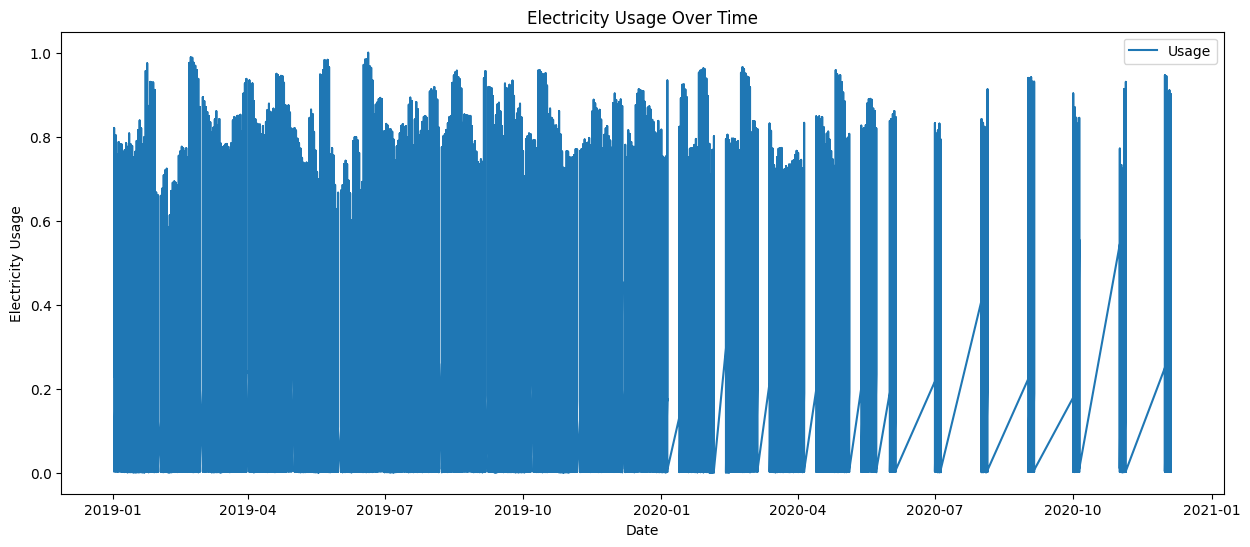

In [ ]:
#Time series plot
plt.figure(figsize=(15, 6))
plt.plot(df['Dates'], df['Usage'], label='Usage')
plt.xlabel('Date')
plt.ylabel('Electricity Usage')
plt.title('Electricity Usage Over Time')
plt.legend()
plt.show()


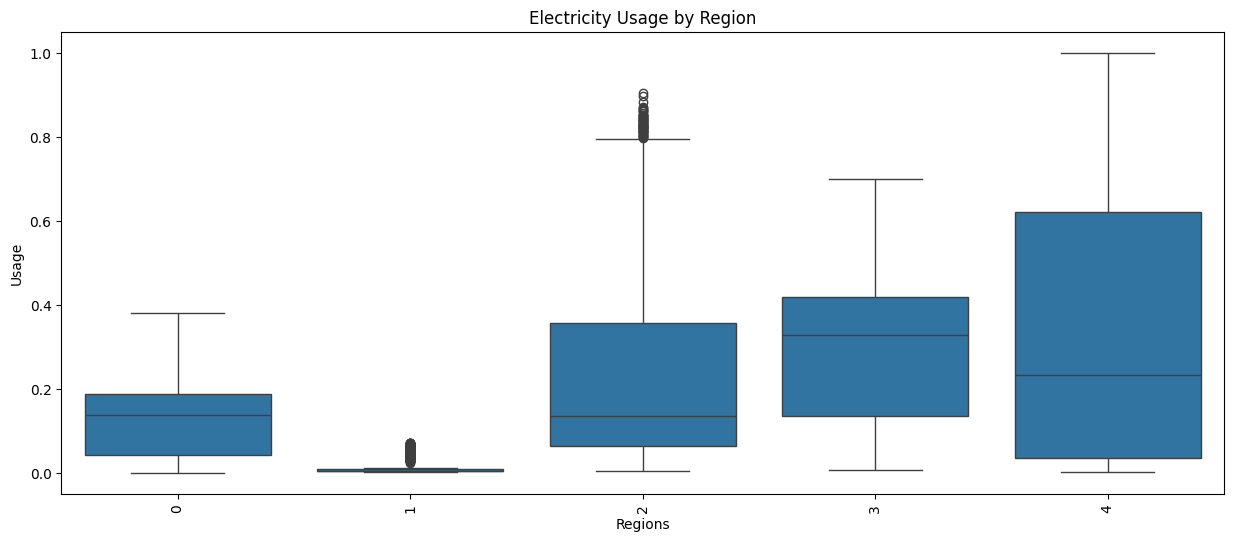

In [ ]:
#Box plot
plt.figure(figsize=(15, 6))
sns.boxplot(x='Regions', y='Usage', data=df)
plt.title('Electricity Usage by Region')
plt.xticks(rotation=90)
plt.show()


**Usage by month**

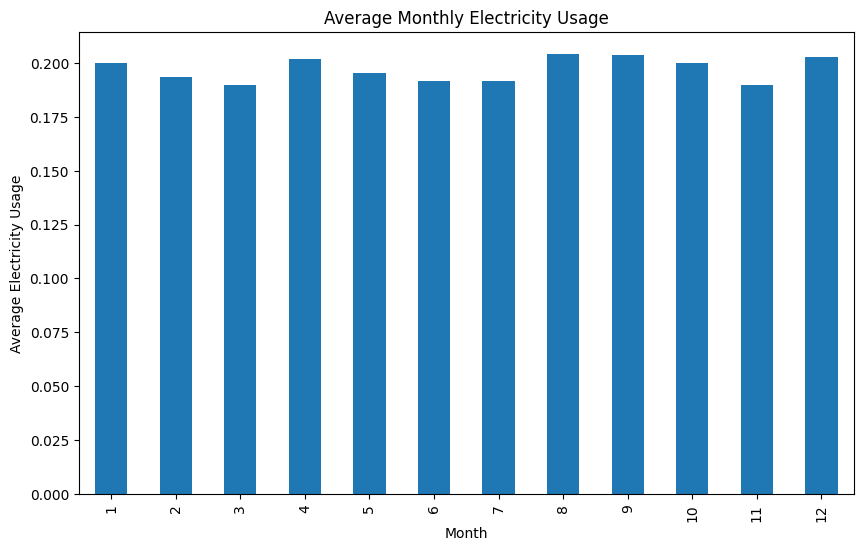

In [ ]:
df['Month'] = df['Dates'].dt.month
monthly_usage = df.groupby('Month')['Usage'].mean()

plt.figure(figsize=(10, 6))
monthly_usage.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Electricity Usage')
plt.title('Average Monthly Electricity Usage')
plt.show()


**Usage by Day of the Week**

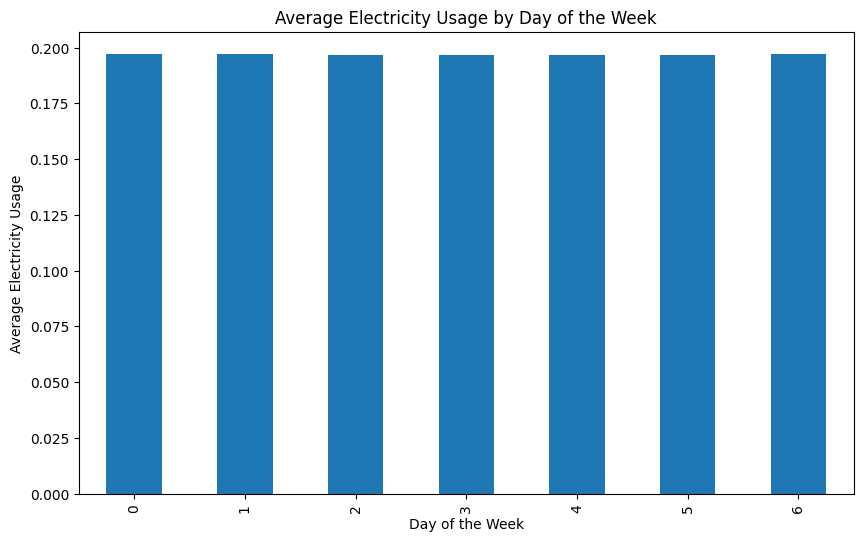

In [ ]:
df['DayOfWeek'] = df['Dates'].dt.dayofweek
weekday_usage = df.groupby('DayOfWeek')['Usage'].mean()

plt.figure(figsize=(10, 6))
weekday_usage.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Average Electricity Usage')
plt.title('Average Electricity Usage by Day of the Week')
plt.show()


**Seasonal Subseries Plot**

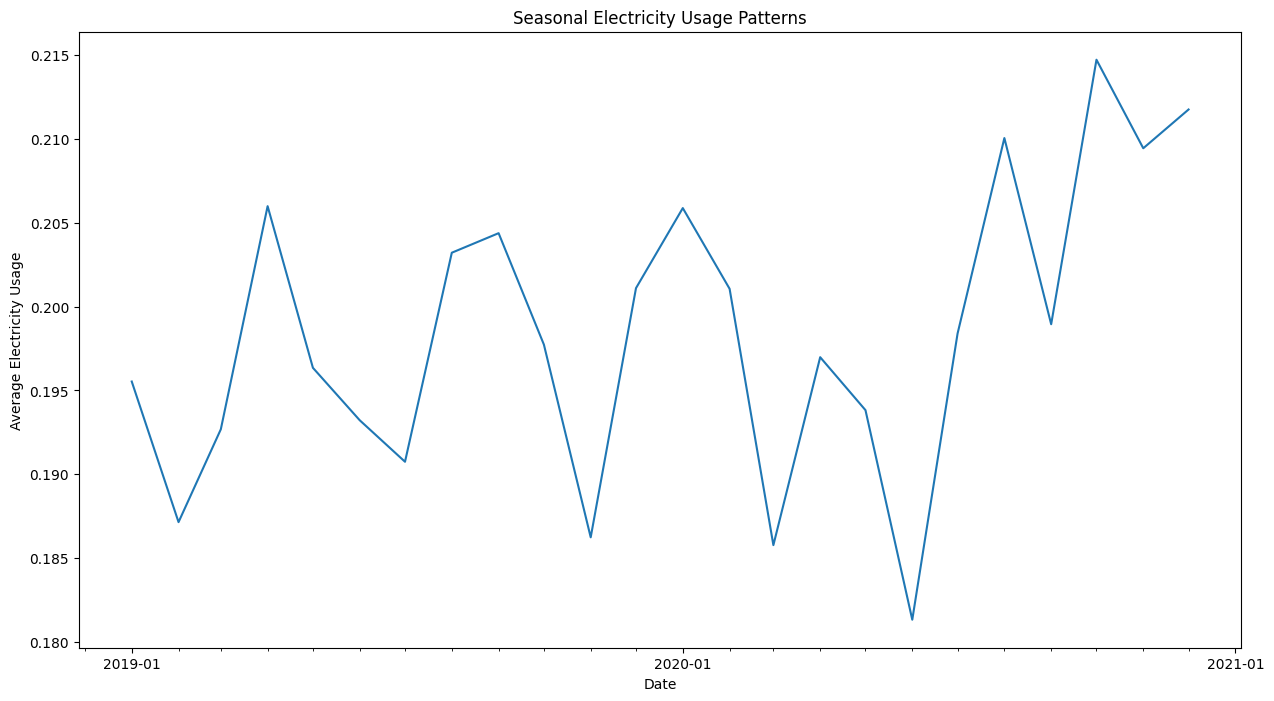

In [ ]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15, 8))
df['YearMonth'] = df['Dates'].dt.to_period('M')
seasonal_usage = df.groupby('YearMonth')['Usage'].mean()

seasonal_usage.index = seasonal_usage.index.to_timestamp()
ax.plot(seasonal_usage.index, seasonal_usage.values)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel('Date')
plt.ylabel('Average Electricity Usage')
plt.title('Seasonal Electricity Usage Patterns')
plt.show()


**Usage by region**

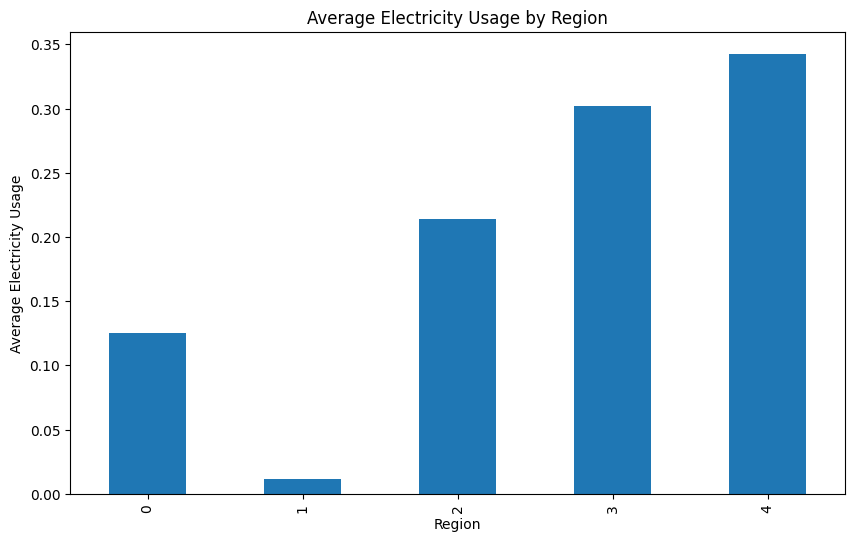

In [ ]:
region_usage = df.groupby('Regions')['Usage'].mean()

plt.figure(figsize=(10, 6))
region_usage.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Average Electricity Usage')
plt.title('Average Electricity Usage by Region')
plt.xticks(rotation=90)
plt.show()


**Month with Highest Consumption**

In [ ]:
monthly_usage_sum = df.groupby('Month')['Usage'].sum()
max_month = monthly_usage_sum.idxmax()
max_month_value = monthly_usage_sum.max()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
print(f"The month with the highest consumption is: {months[max_month-1]} with a total usage of {max_month_value:.2f}")

The month with the highest consumption is: January with a total usage of 356.63


**Year with highest consumption**

In [ ]:
yearly_usage_sum = df.groupby('Year')['Usage'].sum()
max_year = yearly_usage_sum.idxmax()
max_year_value = yearly_usage_sum.max()
print(f"The year with the highest consumption is: {max_year} with a total usage of {max_year_value:.2f}")

The year with the highest consumption is: 2019 with a total usage of 2323.98


**Day with highest average consumption**

In [ ]:
weekday_avg_usage = df.groupby('DayOfWeek')['Usage'].mean()
max_day = weekday_avg_usage.idxmax()
max_day_value = weekday_avg_usage.max()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
print(f"The day with the highest average consumption is: {days[max_day]} with an average usage of {max_day_value:.2f}")

The day with the highest average consumption is: Sunday with an average usage of 0.20


**Regions with highest consumption**

In [ ]:
region_usage_sum = df.groupby('Regions')['Usage'].sum()
max_region = region_usage_sum.idxmax()
max_region_value = region_usage_sum.max()
print(f"The region with the highest total consumption is: {max_region} with a total usage of {max_region_value:.2f}")

The region with the highest total consumption is: 4 with a total usage of 1033.85


In [ ]:
# Check for duplicate datetime entries
duplicate_dates = df.index[df.index.duplicated(keep=False)]
print("Duplicate dates:", duplicate_dates)

# Remove duplicate entries
df = df[~df.index.duplicated(keep='first')]

# Now set the frequency of the DateTimeIndex
df = df.asfreq('H')

# Ensure there are no missing values after setting the frequency
df = df.dropna()

# Verify the index frequency
print(df.index)



Duplicate dates: Index([], dtype='int64')
DatetimeIndex([], dtype='datetime64[ns]', freq='H')


**SARIMA MODEL**

Duplicate dates: DatetimeIndex(['2019-01-02', '2019-01-02', '2019-01-02', '2019-01-02',
               '2019-01-02', '2019-01-02', '2019-01-02', '2019-01-02',
               '2019-01-02', '2019-01-02',
               ...
               '2020-12-05', '2020-12-05', '2020-12-05', '2020-12-05',
               '2020-12-05', '2020-12-05', '2020-12-05', '2020-12-05',
               '2020-12-05', '2020-12-05'],
              dtype='datetime64[ns]', name='Dates', length=16599, freq=None)
Root Mean Squared Error: 0.2544


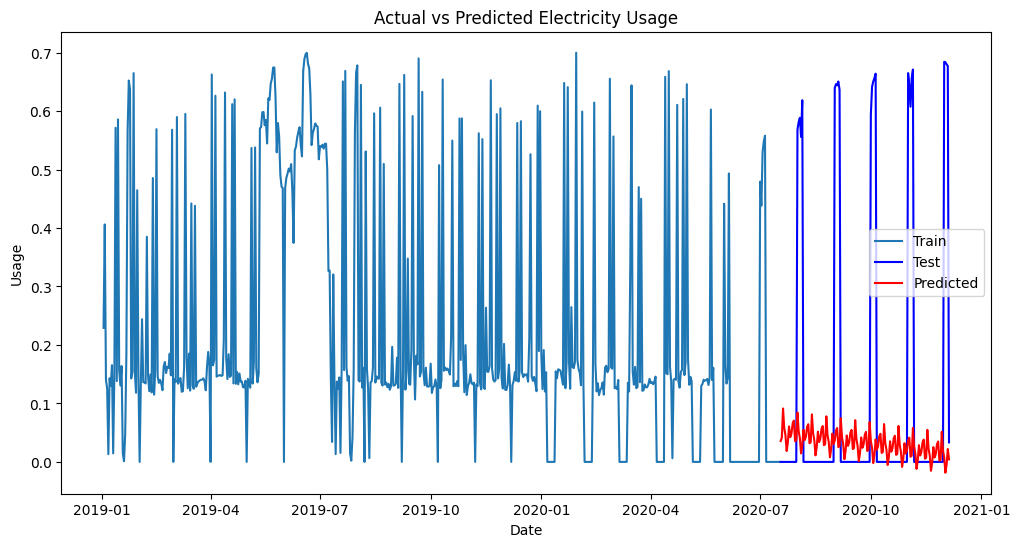

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load and preprocess the dataset
df = pd.read_csv('/content/drive/MyDrive/long_data_.csv')
df.dropna(inplace=True)
df['Dates'] = pd.to_datetime(df['Dates'], format='%d/%m/%Y %H:%M:%S')
df.sort_values(by='Dates', inplace=True)  # Ensure data is sorted by date

# Encode and scale the relevant columns
label_encoder = LabelEncoder()
df['Regions'] = label_encoder.fit_transform(df['Regions'])
scaler = MinMaxScaler()
df['Usage'] = scaler.fit_transform(df[['Usage']])

# Set the date as the index
df.set_index('Dates', inplace=True)

# Check for duplicate datetime entries
duplicate_dates = df.index[df.index.duplicated(keep=False)]
if not duplicate_dates.empty:
    print("Duplicate dates:", duplicate_dates)

# Remove duplicate entries if any
df = df[~df.index.duplicated(keep='first')]

# Aggregate data to daily usage
daily_usage = df['Usage'].resample('D').sum()

# Split the data into training and testing sets
train_size = int(len(daily_usage) * 0.8)
train, test = daily_usage[:train_size], daily_usage[train_size:]

# Fit the SARIMA model on the training set
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit(disp=False)

# Make predictions on the test set
start = len(train)
end = len(train) + len(test) - 1
predictions = sarima_result.predict(start=start, end=end, dynamic=False)

# Evaluate the model performance using RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'Root Mean Squared Error: {rmse:.4f}')

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='blue')
plt.plot(predictions.index, predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.title('Actual vs Predicted Electricity Usage')
plt.legend()
plt.show()


In [ ]:
!pip install prophet


Duplicate dates: DatetimeIndex(['2019-01-02', '2019-01-02', '2019-01-02', '2019-01-02',
               '2019-01-02', '2019-01-02', '2019-01-02', '2019-01-02',
               '2019-01-02', '2019-01-02',
               ...
               '2020-12-05', '2020-12-05', '2020-12-05', '2020-12-05',
               '2020-12-05', '2020-12-05', '2020-12-05', '2020-12-05',
               '2020-12-05', '2020-12-05'],
              dtype='datetime64[ns]', name='Dates', length=16599, freq=None)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphwhjvs33/t9dhhacc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphwhjvs33/qu1tvc9l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72994', 'data', 'file=/tmp/tmphwhjvs33/t9dhhacc.json', 'init=/tmp/tmphwhjvs33/qu1tvc9l.json', 'output', 'file=/tmp/tmphwhjvs33/prophet_modelmo08y__n/prophet_model-20240602054225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:42:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:42:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Root Mean Squared Error: 0.2495


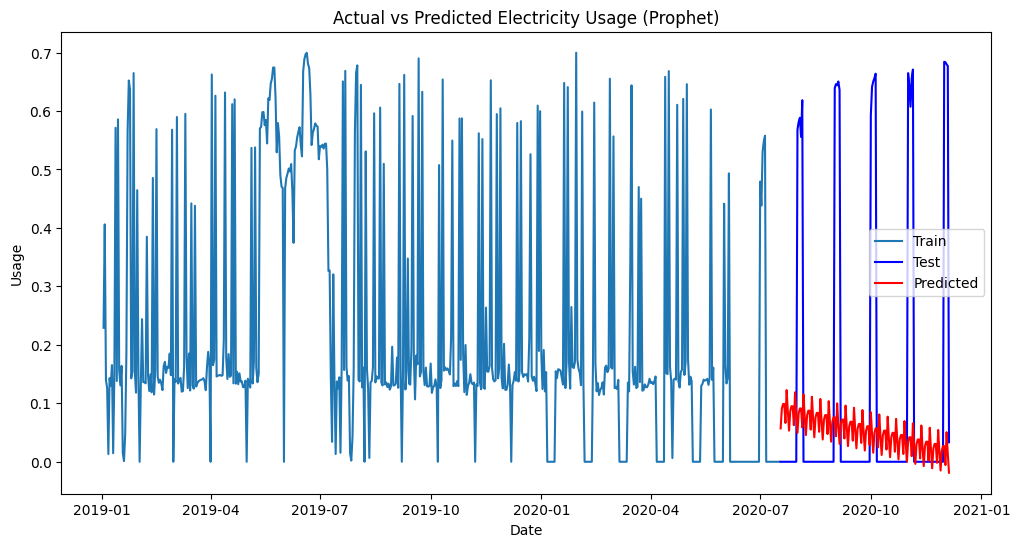

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# Load and preprocess the dataset
df = pd.read_csv('/content/drive/MyDrive/long_data_.csv')
df.dropna(inplace=True)
df['Dates'] = pd.to_datetime(df['Dates'], format='%d/%m/%Y %H:%M:%S')
df.sort_values(by='Dates', inplace=True)  # Ensure data is sorted by date

# Encode and scale the relevant columns
label_encoder = LabelEncoder()
df['Regions'] = label_encoder.fit_transform(df['Regions'])
scaler = MinMaxScaler()
df['Usage'] = scaler.fit_transform(df[['Usage']])

# Set the date as the index
df.set_index('Dates', inplace=True)

# Check for duplicate datetime entries
duplicate_dates = df.index[df.index.duplicated(keep=False)]
if not duplicate_dates.empty:
    print("Duplicate dates:", duplicate_dates)

# Remove duplicate entries if any
df = df[~df.index.duplicated(keep='first')]

# Aggregate data to daily usage
daily_usage = df['Usage'].resample('D').sum().reset_index()

# Prepare data for Prophet
daily_usage.columns = ['ds', 'y']

# Split the data into training and testing sets
train_size = int(len(daily_usage) * 0.8)
train, test = daily_usage[:train_size], daily_usage[train_size:]

# Fit the Prophet model on the training set
prophet_model = Prophet()
prophet_model.fit(train)

# Make predictions on the test set
future = prophet_model.make_future_dataframe(periods=len(test))
forecast = prophet_model.predict(future)

# Extract the predictions
predictions = forecast[['ds', 'yhat']].set_index('ds').loc[test['ds']]

# Evaluate the model performance using RMSE
rmse = np.sqrt(mean_squared_error(test['y'], predictions['yhat']))
print(f'Root Mean Squared Error: {rmse:.4f}')

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Test', color='blue')
plt.plot(predictions.index, predictions['yhat'], label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.title('Actual vs Predicted Electricity Usage (Prophet)')
plt.legend()
plt.show()


Duplicate dates: DatetimeIndex(['2019-01-02', '2019-01-02', '2019-01-02', '2019-01-02',
               '2019-01-02', '2019-01-02', '2019-01-02', '2019-01-02',
               '2019-01-02', '2019-01-02',
               ...
               '2020-12-05', '2020-12-05', '2020-12-05', '2020-12-05',
               '2020-12-05', '2020-12-05', '2020-12-05', '2020-12-05',
               '2020-12-05', '2020-12-05'],
              dtype='datetime64[ns]', name='Dates', length=16599, freq=None)
Root Mean Squared Error: 0.2544


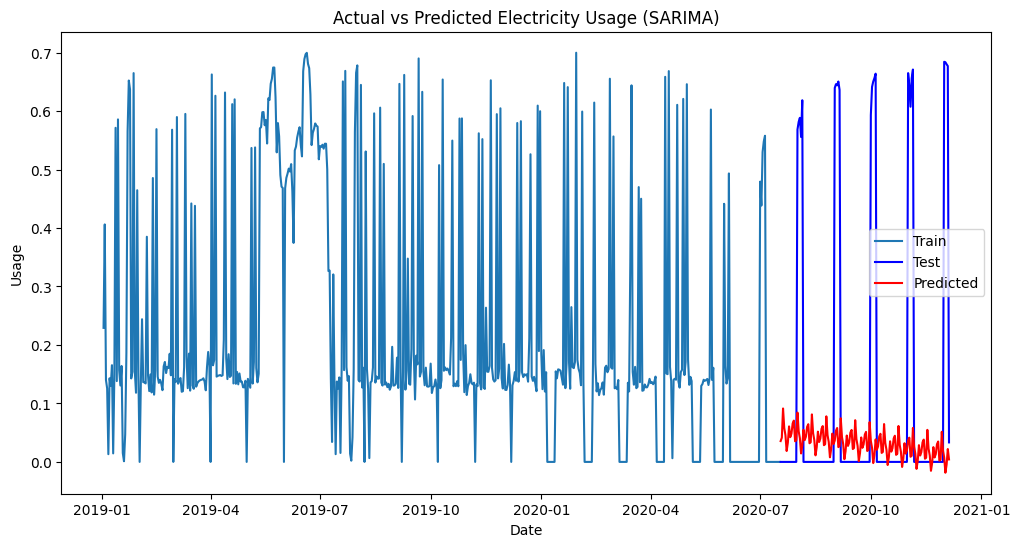

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load and preprocess the dataset
df = pd.read_csv('/content/drive/MyDrive/long_data_.csv')
df.dropna(inplace=True)
df['Dates'] = pd.to_datetime(df['Dates'], format='%d/%m/%Y %H:%M:%S')
df.sort_values(by='Dates', inplace=True)  # Ensure data is sorted by date

# Encode and scale the relevant columns
label_encoder = LabelEncoder()
df['Regions'] = label_encoder.fit_transform(df['Regions'])
scaler = MinMaxScaler()
df['Usage'] = scaler.fit_transform(df[['Usage']])

# Set the date as the index
df.set_index('Dates', inplace=True)

# Check for duplicate datetime entries
duplicate_dates = df.index[df.index.duplicated(keep=False)]
if not duplicate_dates.empty:
    print("Duplicate dates:", duplicate_dates)

# Remove duplicate entries if any
df = df[~df.index.duplicated(keep='first')]

# Aggregate data to daily usage
daily_usage = df['Usage'].resample('D').sum()

# Split the data into training and testing sets
train_size = int(len(daily_usage) * 0.8)
train, test = daily_usage[:train_size], daily_usage[train_size:]

# Fit the SARIMA model on the training set
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit(disp=False)

# Make predictions on the test set
start = len(train)
end = len(train) + len(test) - 1
predictions = sarima_result.predict(start=start, end=end, dynamic=False)

# Evaluate the model performance using RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'Root Mean Squared Error: {rmse:.4f}')

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='blue')
plt.plot(predictions.index, predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.title('Actual vs Predicted Electricity Usage (SARIMA)')
plt.legend()
plt.show()
